# 3. spike clustering evaluation

In [1]:
import sys
import os

import torch
from sklearn.decomposition import PCA

# Get the absolute path of the parent directory (project root)
project_root = os.path.abspath(os.path.join(os.getcwd(), '..'))

# Add the project root to the Python path
if project_root not in sys.path:
    sys.path.append(project_root)

from src.utils import load_and_concatenate_npy
from src.models import ShallowAutoencoder
from src.cluster import plot_reconstruction, apply_and_plot_dbscan

from scripts.train_autoencoder import train_ae


In [2]:
# 1. Train the Autoencoder Model
# This will train the autoencoder on the specified training data and save the model.
print("--- Starting Autoencoder Model Training ---")
train_ae()
print("\n--- Autoencoder Model Training Complete ---")

--- Starting Autoencoder Model Training ---
Loading data...
Successfully loaded file: ../data/spikes/channel_spikes_9.npy with shape (1079, 42)
Successfully loaded file: ../data/spikes/channel_spikes_16.npy with shape (253, 42)
Successfully loaded file: ../data/spikes/channel_spikes_33.npy with shape (1159, 42)
Successfully loaded file: ../data/spikes/channel_background_9.npy with shape (5704, 42)
Successfully loaded file: ../data/spikes/channel_background_16.npy with shape (4324, 42)
Successfully loaded file: ../data/spikes/channel_background_33.npy with shape (2934, 42)

All arrays concatenated. Final shape: (15453, 42)
Total number of spikes loaded: 15453
Starting autoencoder training for 200 epochs...
Epoch [20/200], Loss: 15372.1328
Epoch [40/200], Loss: 11916.0156
Epoch [60/200], Loss: 8326.2383
Epoch [80/200], Loss: 6430.4658
Epoch [100/200], Loss: 5618.3027
Epoch [120/200], Loss: 5039.0024
Epoch [140/200], Loss: 4540.7139
Epoch [160/200], Loss: 4180.6055
Epoch [180/200], Loss: 

In [3]:
# 2. Load Test Data for Evaluation
test_file_paths = [
    '../data/spikes/channel_spikes_40.npy',
    '../data/spikes/channel_background_40.npy'
]
all_test_data_np = load_and_concatenate_npy(test_file_paths)
all_test_data_tensor = torch.from_numpy(all_test_data_np).float()
print(f"Total number of test waveforms loaded: {all_test_data_tensor.shape[0]}")

Loading data...
Successfully loaded file: ../data/spikes/channel_spikes_40.npy with shape (108, 42)
Successfully loaded file: ../data/spikes/channel_background_40.npy with shape (4073, 42)

All arrays concatenated. Final shape: (4181, 42)
Total number of test waveforms loaded: 4181


In [4]:
# 3. Load the Trained Autoencoder Model
autoencoder_model = ShallowAutoencoder()
autoencoder_model.load_state_dict(torch.load('../model/best_autoencoder_model.pth'))
autoencoder_model.eval()

ShallowAutoencoder(
  (encoder): Sequential(
    (0): Linear(in_features=42, out_features=21, bias=True)
    (1): ReLU()
    (2): Linear(in_features=21, out_features=3, bias=True)
  )
  (decoder): Sequential(
    (0): Linear(in_features=3, out_features=21, bias=True)
    (1): ReLU()
    (2): Linear(in_features=21, out_features=42, bias=True)
  )
)


--- Plotting Reconstruction of Test Data ---


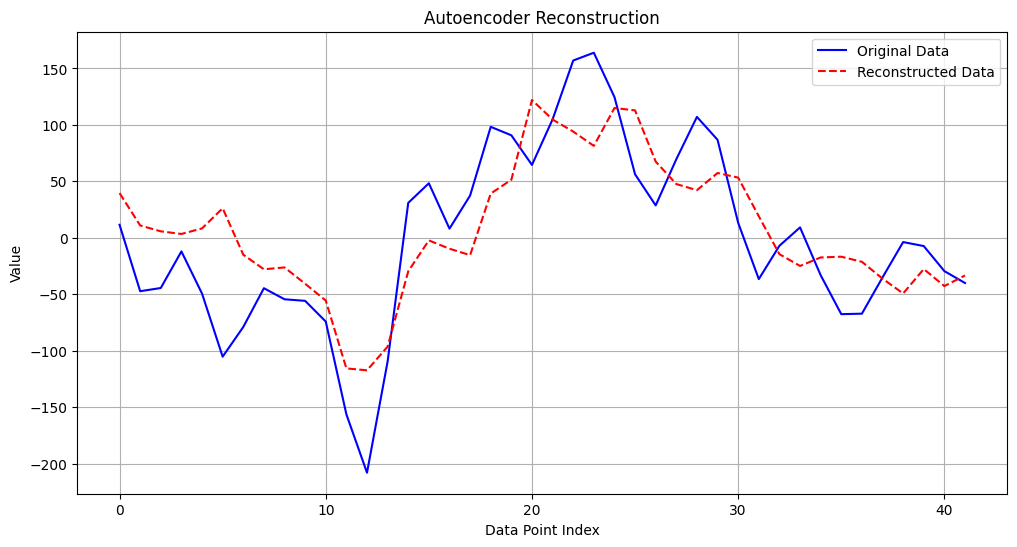

In [8]:
# 4. Plot Reconstruction of Test Data
print("\n--- Plotting Reconstruction of Test Data ---")
plot_reconstruction(autoencoder_model, all_test_data_tensor)


--- Applying DBSCAN Clustering on Autoencoder Embeddings of Test Data ---


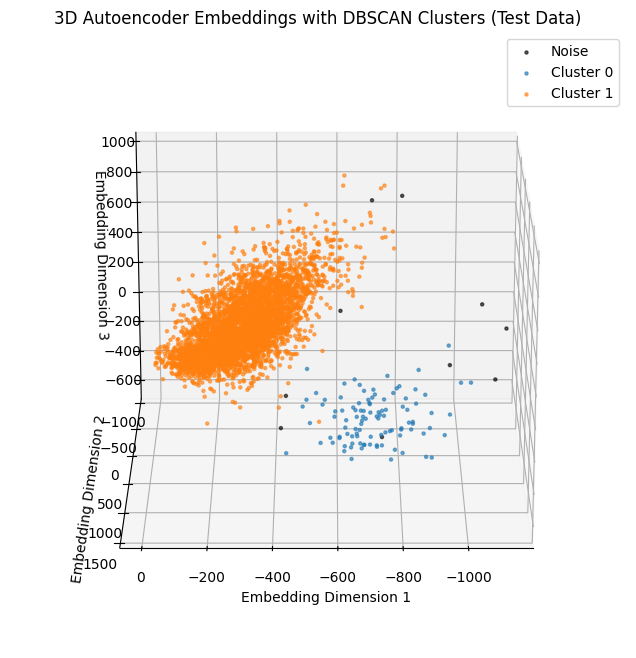

In [9]:
# 5. Get Embeddings and Plot Clusters from Autoencoder of Test Dataset
print("\n--- Applying DBSCAN Clustering on Autoencoder Embeddings of Test Data ---")
with torch.no_grad():
    autoencoder_embeddings = autoencoder_model.encoder(all_test_data_tensor).cpu().numpy()

apply_and_plot_dbscan(
    data_embeddings=autoencoder_embeddings,
    title='3D Autoencoder Embeddings with DBSCAN Clusters (Test Data)',
    x_label='Embedding Dimension 1',
    y_label='Embedding Dimension 2',
    z_label='Embedding Dimension 3',
    eps=250, 
    min_samples=10
)


--- Applying PCA and DBSCAN on Test Data ---


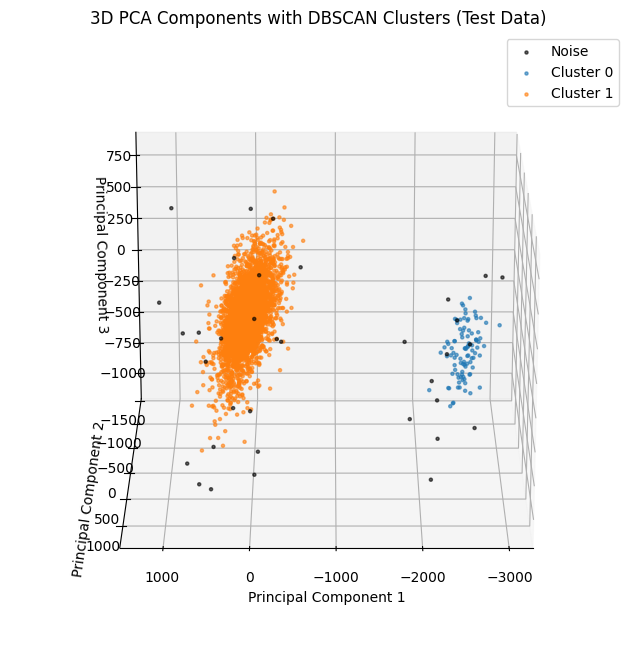

In [10]:
# 6. Apply PCA and Plot Clusters on Test Data
print("\n--- Applying PCA and DBSCAN on Test Data ---")
pca = PCA(n_components=3)
pca_embeddings = pca.fit_transform(all_test_data_np)

apply_and_plot_dbscan(
    data_embeddings=pca_embeddings,
    title='3D PCA Components with DBSCAN Clusters (Test Data)',
    x_label='Principal Component 1',
    y_label='Principal Component 2',
    z_label='Principal Component 3',
    eps=250, 
    min_samples=10
)